Final Report, AI
===

As a boss, assign a task to all of you, `best` in our company: design a best model with the past data to

```
design a stradegy of trading,
arise the the company's profit.
```

Template
---

1. data: Kaggle's Groceries Dataset, includes details of items trasaction of groceries during 2014 and 2015.
2. Follow the questions or your discuss to explare the data and summary your results.

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# upload the data set and read
file="https://github.com/cchuang2009/2024/raw/refs/heads/main/2024-2/AI/data/Groceries_dataset.csv.zip"
df=pd.read_csv(file)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
df.head(5)

Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

Data Pre-Processing
---
1. Data washing,
2. Datetime feature


In [ ]:
# Rename the features

groceries=pd.DataFrame()
groceries[['id','item']]=df[['Member_number','itemDescription']]


In [ ]:
# retriete time features, Year, Month, day, weekday

df['Date']= pd.to_datetime(df['Date'])

groceries['Date'] = df['Date']
#Extracting year,month and day
groceries['year'] = df['Date'].apply(lambda x : x.year)
groceries['month'] = df['Date'].apply(lambda x : x.month)
groceries['day'] = df['Date'].apply(lambda x : x.day)
groceries['weekday'] = df['Date'].apply(lambda x : x.weekday())

groceries=groceries[['id', 'Date','year', 'month', 'day','weekday','item']]

EDA
---

In [ ]:
# In What time data are contained

groceries['year'].value_counts()

year
2015    20488
2014    18277
Name: count, dtype: int64

Question
---

At what time did the data occur?

In [ ]:
# the last date of data included
groceries['Date'].max()

Timestamp('2015-12-30 00:00:00')

In [ ]:
# Split Filtering data by year 2014 and 2015
# observe the behavoirs respectively

df1 = groceries[groceries['year']==2014]
df2 = groceries[groceries['year']==2015]

In [ ]:
df1.head(2)

id       Date  year  month  day  weekday            item
8696  1664 2014-10-01  2014     10    1        2      rolls/buns
8697  3942 2014-12-16  2014     12   16        1  hamburger meat

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

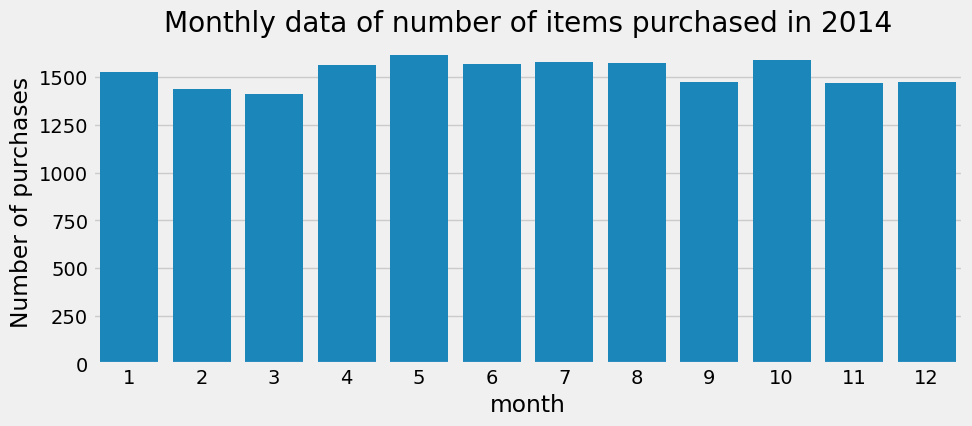

In [ ]:
# monthly Sale in 2014

# sie of pic: [10,4]
plt.figure(figsize=[10,4])
plt.style.use('fivethirtyeight')

sns.countplot(x='month',data=df1[df1['year']==2014])
plt.title('Monthly data of number of items purchased in 2014')
plt.ylabel('Number of purchases')
plt.show()


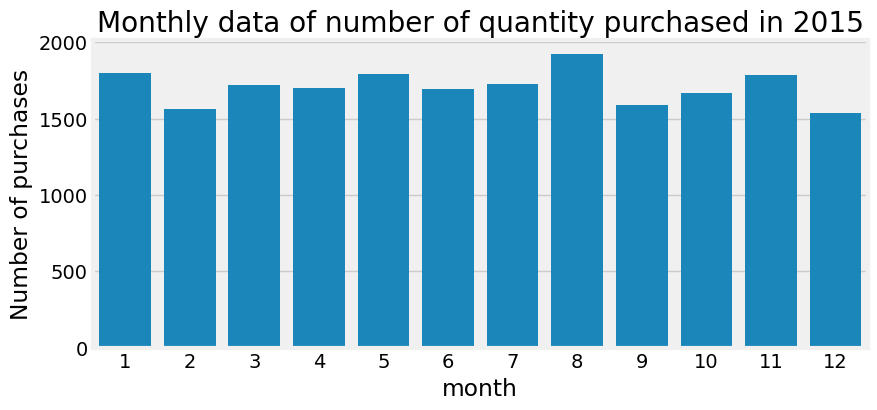

In [ ]:
#  monthly Sale in 2015

plt.figure(figsize=[10,4])
plt.style.use('fivethirtyeight')
sns.countplot(x='month',data=df2[df2['year']==2015])

plt.title('Monthly data of number of quantity purchased in 2015')
plt.ylabel('Number of purchases')
plt.show()

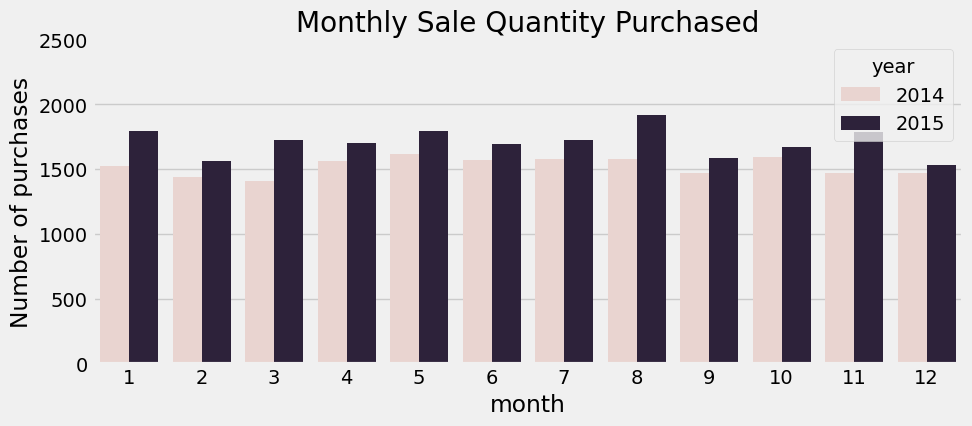

In [ ]:
# merge two plots together by hue=year

plt.figure(figsize=[10,4])
plt.style.use('fivethirtyeight')

sns.countplot(x='month',data=groceries,hue='year')
plt.title('Monthly Sale Quantity Purchased')
plt.ylim([0,2500])
plt.ylabel('Number of purchases')
plt.show()


<Big>**Any** similarity  between 2014 data and 2015 data? Or oppose?</Big>

Text(0.5, 1.0, 'Day Transaction across a  Month in 2014')

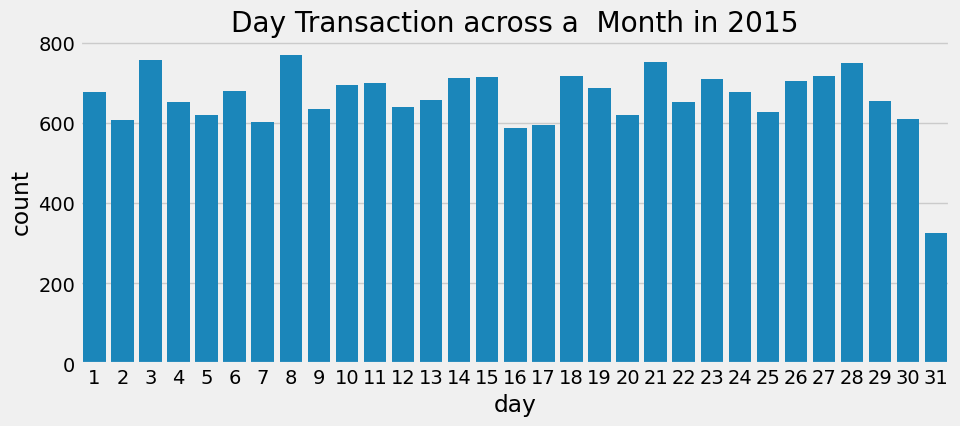

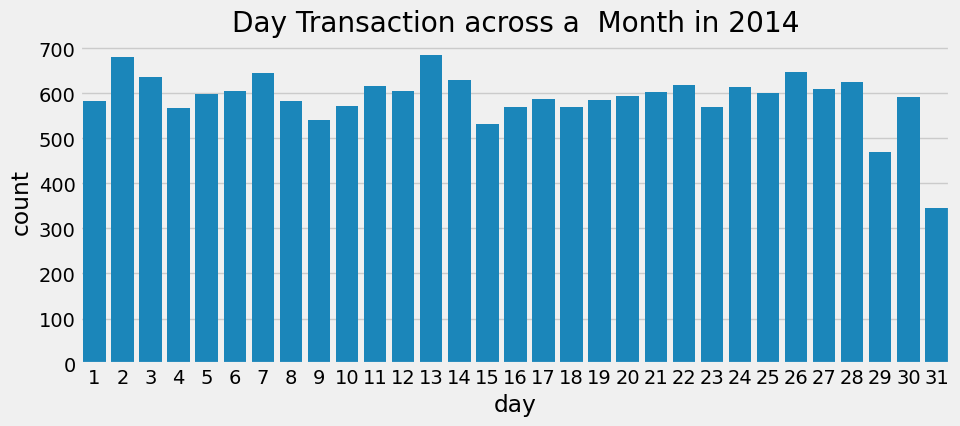

In [ ]:
# Plotting day transaction across a typical month in 2014 and 2015
plt.figure(figsize=[10,4])
plt.style.use('fivethirtyeight')
sns.countplot(x='day',data=df2[df2['year']==2015])
plt.title('Day Transaction across a  Month in 2015')

plt.figure(figsize=[10,4])
plt.style.use('fivethirtyeight')
sns.countplot(x='day',data=df1[df1['year']==2014])
plt.title('Day Transaction across a  Month in 2014')



Qusetion
---

<big>What happens at date 31 such that the the average daily `Sale Quantity` is minimum  at `31`th each monoth?  </big>

Text(0.5, 1.0, 'Day transaction In typical month during 2014-2015')

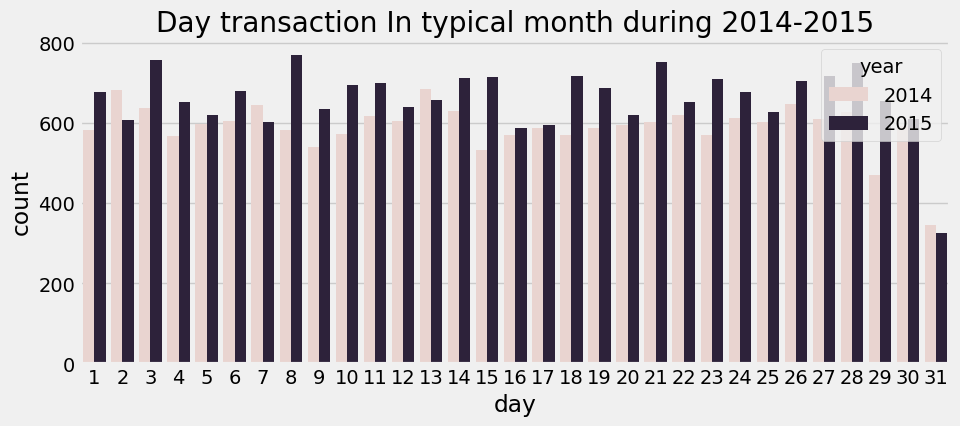

In [ ]:
# Plotting day transaction across a typical month in 2014 and 2015
plt.figure(figsize=[10,4])
plt.style.use('fivethirtyeight')
sns.countplot(x='day',data=groceries,hue='year')
plt.title('Day transaction In typical month during 2014-2015')


Animation
---
Make animation by `holoview`

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
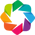

In [ ]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

In [ ]:
# step curve

daily_count=groceries.groupby(['day'])['item'].count()
sales_day=hv.Curve(daily_count).opts(
      ylabel="no of items",
      xlabel='Date',
      title='Daily Cummulative transactions during 2014-2015')


In [ ]:
#Line chart
sales_day.opts(opts.Curve(width=1000, height=300,tools=['hover'],show_grid=True))


:Curve   [day]   (item)

In [ ]:
!pip install -q pyecharts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.7/153.7 kB 5.2 MB/s eta 0:00:00


In [ ]:
# Creating temporary data which has quantity purchased column
# i.e. total sold quantity of each item

temp=groceries.copy()
temp['qty_purchased']=groceries['id'].map(groceries['id'].value_counts())

In [ ]:
temp.head(2)

id       Date  year  month  day  weekday            item  qty_purchased
0  1808 2015-07-21  2015      7   21        1  tropical fruit             10
1  2552 2015-01-05  2015      1    5        0      whole milk             13

<ipython-input-40-9448d5380725>:10: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use 'selection_point()' or 'selection_interval()' instead.
These functions also include more helpful docstrings.
  brush = alt.selection(type='interval', encodings=['x'])
<ipython-input-40-9448d5380725>:18: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use add_params instead.
  ).add_selection(


alt.LayerChart(...)

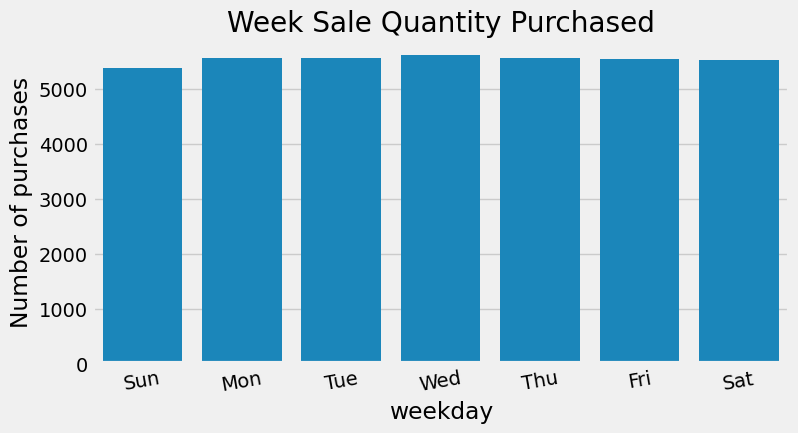

In [ ]:
# merge two plots together by hue=year

plt.figure(figsize=[8,4])
plt.style.use('fivethirtyeight')

sns.countplot(x='weekday',data=groceries)#,hue='year')
plt.title('Week Sale Quantity Purchased')
plt.xticks([0,1,2,3,4,5,6],['Sun','Mon','Tue','Wed','Thu','Fri','Sat'],rotation=10)

#plt.ylim([0,2500])
plt.ylabel('Number of purchases')
plt.show()

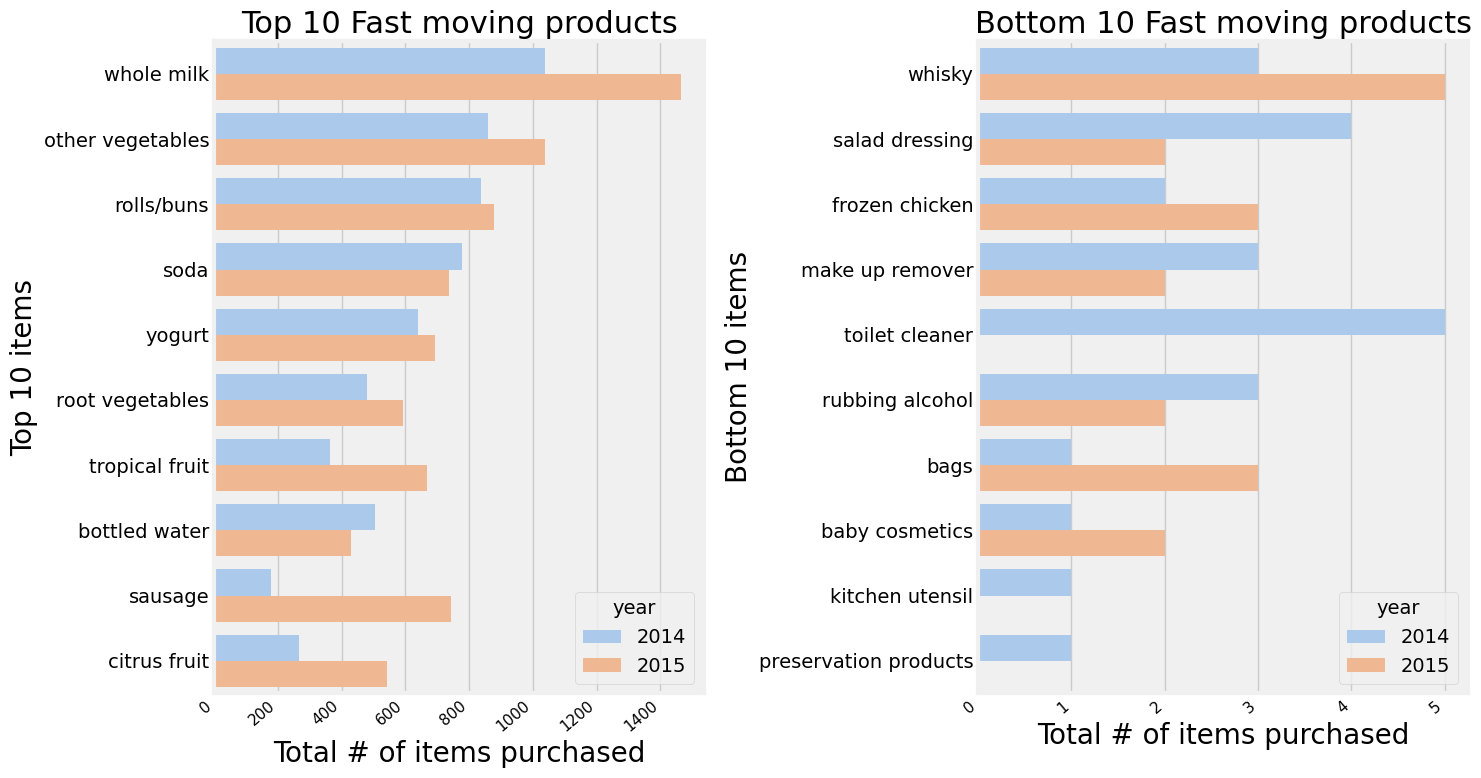

In [ ]:
#Setting plot style
plt.figure(figsize = (15, 8))
plt.style.use('fivethirtyeight')

#Top 10 fast moving products
plt.subplot(1,2,1)
ax=sns.countplot(y="item", hue="year", data=groceries, palette="pastel",
              order=groceries.item.value_counts().iloc[:10].index)

ax.set_xticklabels(ax.get_xticklabels(),fontsize=11,rotation=40, ha="right")
ax.set_title('Top 10 Fast Sale products',fontsize= 22)
ax.set_xlabel('Total # of items purchased',fontsize = 20)
ax.set_ylabel('Top 10 items', fontsize = 20)
plt.tight_layout()

#Bottom 10 fast moving products
plt.subplot(1,2,2)
ax=sns.countplot(y="item", hue="year", data=groceries, palette="pastel",
              order=groceries.item.value_counts().iloc[-10:].index)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=11,rotation=40, ha="right")
ax.set_title('Bottom 10 Fast mSale products',fontsize= 22)
ax.set_xlabel('Total # of items purchased',fontsize = 20)
ax.set_ylabel('Bottom 10 items', fontsize = 20)
plt.tight_layout()

In [ ]:
import altair as alt

In [ ]:
#Getting the top customers based on quantity purchased
top_customers=temp[['id', 'qty_purchased','year']].sort_values(by = 'qty_purchased',ascending = False).head(500)

#Converting the datatype of id and year
top_customers.id = top_customers.id.astype('category')
top_customers.year = top_customers.year.astype('category')

#Plotting
alt.Chart(top_customers).mark_bar(color="darkgreen").encode(
    x='qty_purchased',
    y=alt.Y('id', sort='-x'),
    color='year',
    tooltip=['id','qty_purchased']
).properties(height=400,width=600,title="Top Customers")

alt.Chart(...)

BestSeller
---

<Big>In Machine Learning field, we can use `WordCloud` to make a fancy visulation for freqenctly used strings; here, we introduce the `treemap` way, occasionally used in economical data, to replace it.</Big>

In [ ]:
import wordcloud
from wordcloud import WordCloud

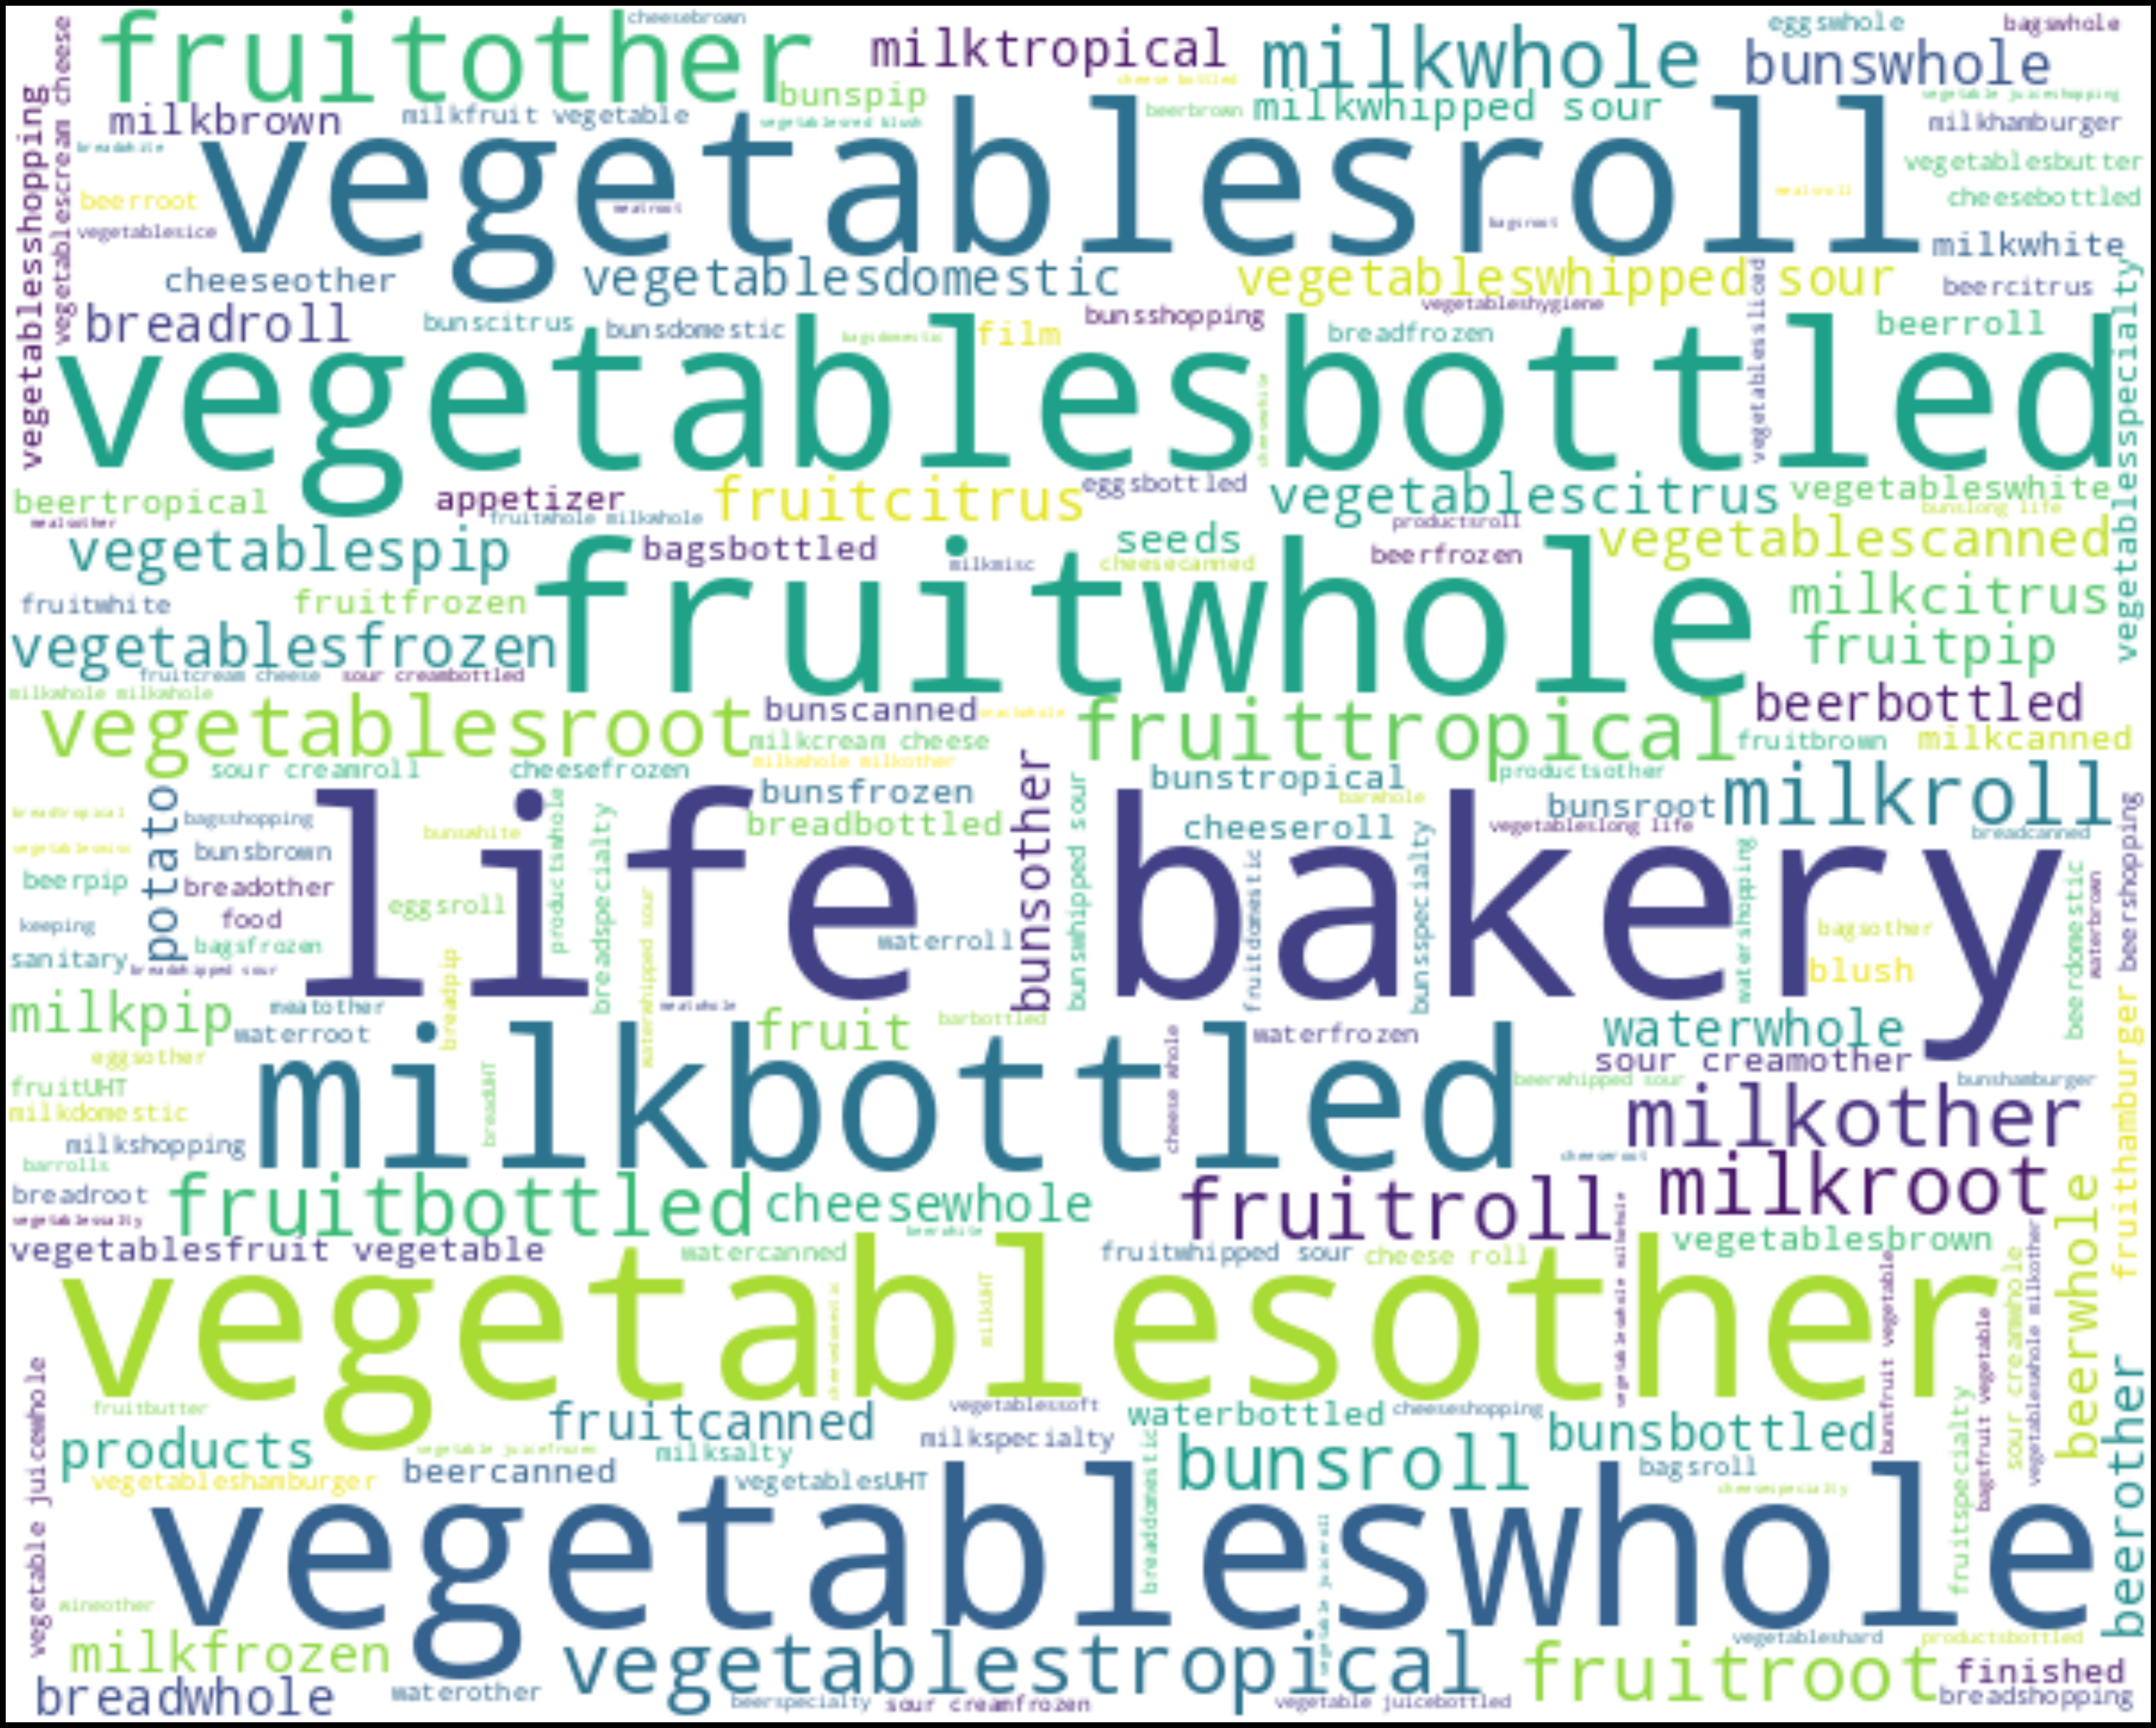

In [ ]:
# @title
#Wordcloud
wordcloud = WordCloud(
    width = 600,
    height = 480,
    background_color = 'white').generate("".join(groceries['item']))
fig = plt.figure(
    figsize = (50, 30),
    facecolor = 'k',
    edgecolor = 'k')

#Display plot
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
# treemap 0f Popularity
fig = px.treemap(temp,
           path=['item'],
           #path=['weekday','item'],
           values='qty_purchased',
           color='item',
           color_continuous_scale='RdBu',
           hover_data=['qty_purchased'],
           width=1000, height=600,
           title="Item Population",
           )
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))


<img src="https://drive.google.com/uc?export=view&id=17I-FRta0X1a9e_78UgPxUiD1oAB4A3Ds"  />



Association
---
<Big>As we had learned, we can recommend goods according customers' favor.

In [ ]:
#Apriori libraries
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
#Creating sparse matrix
basket = (temp.groupby(['id', 'item'])['qty_purchased']
          .sum().unstack().reset_index().fillna(0)
          .set_index('id'))

In [ ]:
#Eoding the quantity urchased
def encode(x):
    '''Encoding the quantity of products with 0s and 1s
    0:when qty is less than or equal to 0
    1:when qty is greater than or equal to 1'''
    if x <= 0:
        return 0
    if x >= 1:
        return 1

#Appying on our data
basket_sets = basket.applymap(encode)
basket_sets

item  Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
id                                                                          
1000                      0         0                 0                 0   
1001                      0         0                 0                 0   
1002                      0         0                 0                 0   
1003                      0         0                 0                 0   
1004                      0         0                 0                 0   
...                     ...       ...               ...               ...   
4996                      0         0                 0                 0   
4997                      0         0                 0                 0   
4998                      0         0                 0                 0   
4999                      0         0                 0                 0   
5000                      0         0                 0                 0   

item  baby cosmetics  bags  baking powder  bathroom cleaner  beef  berries  \
id                                                                           
1000               0     0              0                 0     0        0   
1001               0     0              0                 0     1        0   
1002               0     0              0                 0     0        0   
1003               0     0              0                 0     0        0   
1004               0     0              0                 0     0        0   
...              ...   ...            ...               ...   ...      ...   
4996               0     0              0                 0     0        0   
4997               0     0              0                 0     0        0   
4998               0     0              0                 0     0        0   
4999               0     0              0                 0     0        1   
5000               0     0              0                 0     0        0   

item  ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
id    ...                                                                      
1000  ...       0        0        0                   0       0            0   
1001  ...       0        0        0                   1       0            1   
1002  ...       0        0        0                   0       0            0   
1003  ...       0        0        0                   0       0            0   
1004  ...       0        0        0                   0       0            0   
...   ...     ...      ...      ...                 ...     ...          ...   
4996  ...       0        0        0                   0       0            0   
4997  ...       0        0        0                   0       0            0   
4998  ...       0        0        0                   0       0            0   
4999  ...       0        0        0                   1       0            0   
5000  ...       0        0        0                   0       0            0   

item  white wine  whole milk  yogurt  zwieback  
id                                              
1000           0           1       1         0  
1001           0           1       0         0  
1002           0           1       0         0  
1003           0           0       0         0  
1004           0           1       0         0  
...          ...         ...     ...       ...  
4996           0           0       0         0  
4997           1           1       0         0  
4998           0           0       0         0  
4999           0           0       1         0  
5000           0           0       0         0  

[3898 rows x 167 columns]

In [ ]:
#Apriori- Support70%
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

#Associaton rules-using lift
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.tail()

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



antecedents                     consequents  \
93      (yogurt, other vegetables)                    (whole milk)   
94  (whole milk, other vegetables)                        (yogurt)   
95                        (yogurt)  (whole milk, other vegetables)   
96                    (whole milk)      (yogurt, other vegetables)   
97              (other vegetables)            (yogurt, whole milk)   

    antecedent support  consequent support   support  confidence      lift  \
93            0.120318            0.458184  0.071832    0.597015  1.303003   
94            0.191380            0.282966  0.071832    0.375335  1.326434   
95            0.282966            0.191380  0.071832    0.253853  1.326434   
96            0.458184            0.120318  0.071832    0.156775  1.303003   
97            0.376603            0.150590  0.071832    0.190736  1.266589   

    representativity  leverage  conviction  zhangs_metric   jaccard  \
93               1.0  0.016704    1.344507       0.264348  0.141772   
94               1.0  0.017678    1.147870       0.304344  0.178458   
95               1.0  0.017678    1.083727       0.343217  0.178458   
96               1.0  0.016704    1.043235       0.429190  0.141772   
97               1.0  0.015119    1.049608       0.337631  0.157746   

    certainty  kulczynski  
93   0.256233    0.376895  
94   0.128822    0.314594  
95   0.077259    0.314594  
96   0.041443    0.376895  
97   0.047263    0.333869

In [ ]:
#Customizable function to change the lift and confidence
def rules_mod(lift,confidence):
    '''rules_mod is a function to control the rules
    based on lift and confidence threshold'''
    return rules[ (rules['lift'] >= lift) &
      (rules['confidence'] >= confidence) ]

#Calling function
rules_mod(0.7,0.2)

antecedents                     consequents  \
0                   (bottled beer)                    (whole milk)   
2                  (bottled water)              (other vegetables)   
3               (other vegetables)                 (bottled water)   
4                     (rolls/buns)                 (bottled water)   
5                  (bottled water)                    (rolls/buns)   
..                             ...                             ...   
91              (other vegetables)        (rolls/buns, whole milk)   
92            (yogurt, whole milk)              (other vegetables)   
93      (yogurt, other vegetables)                    (whole milk)   
94  (whole milk, other vegetables)                        (yogurt)   
95                        (yogurt)  (whole milk, other vegetables)   

    antecedent support  consequent support   support  confidence      lift  \
0             0.158799            0.458184  0.085428    0.537964  1.174124   
2             0.213699            0.376603  0.093894    0.439376  1.166680   
3             0.376603            0.213699  0.093894    0.249319  1.166680   
4             0.349666            0.213699  0.079271    0.226706  1.060863   
5             0.213699            0.349666  0.079271    0.370948  1.060863   
..                 ...                 ...       ...         ...       ...   
91            0.376603            0.178553  0.082093    0.217984  1.220834   
92            0.150590            0.376603  0.071832    0.477002  1.266589   
93            0.120318            0.458184  0.071832    0.597015  1.303003   
94            0.191380            0.282966  0.071832    0.375335  1.326434   
95            0.282966            0.191380  0.071832    0.253853  1.326434   

    representativity  leverage  conviction  zhangs_metric   jaccard  \
0                1.0  0.012669    1.172672       0.176297  0.160714   
2                1.0  0.013414    1.111969       0.181695  0.189147   
3                1.0  0.013414    1.047450       0.229175  0.189147   
4                1.0  0.004548    1.016820       0.088219  0.163752   
5                1.0  0.004548    1.033832       0.072964  0.163752   
..               ...       ...         ...            ...       ...   
91               1.0  0.014850    1.050422       0.290165  0.173536   
92               1.0  0.015119    1.191967       0.247793  0.157746   
93               1.0  0.016704    1.344507       0.264348  0.141772   
94               1.0  0.017678    1.147870       0.304344  0.178458   
95               1.0  0.017678    1.083727       0.343217  0.178458   

    certainty  kulczynski  
0    0.147247    0.362207  
2    0.100694    0.344347  
3    0.045300    0.344347  
4    0.016541    0.298827  
5    0.032725    0.298827  
..        ...         ...  
91   0.048001    0.338877  
92   0.161050    0.333869  
93   0.256233    0.376895  
94   0.128822    0.314594  
95   0.077259    0.314594  

[84 rows x 14 columns]

<Axes: xlabel='antecedent support', ylabel='consequent support'>

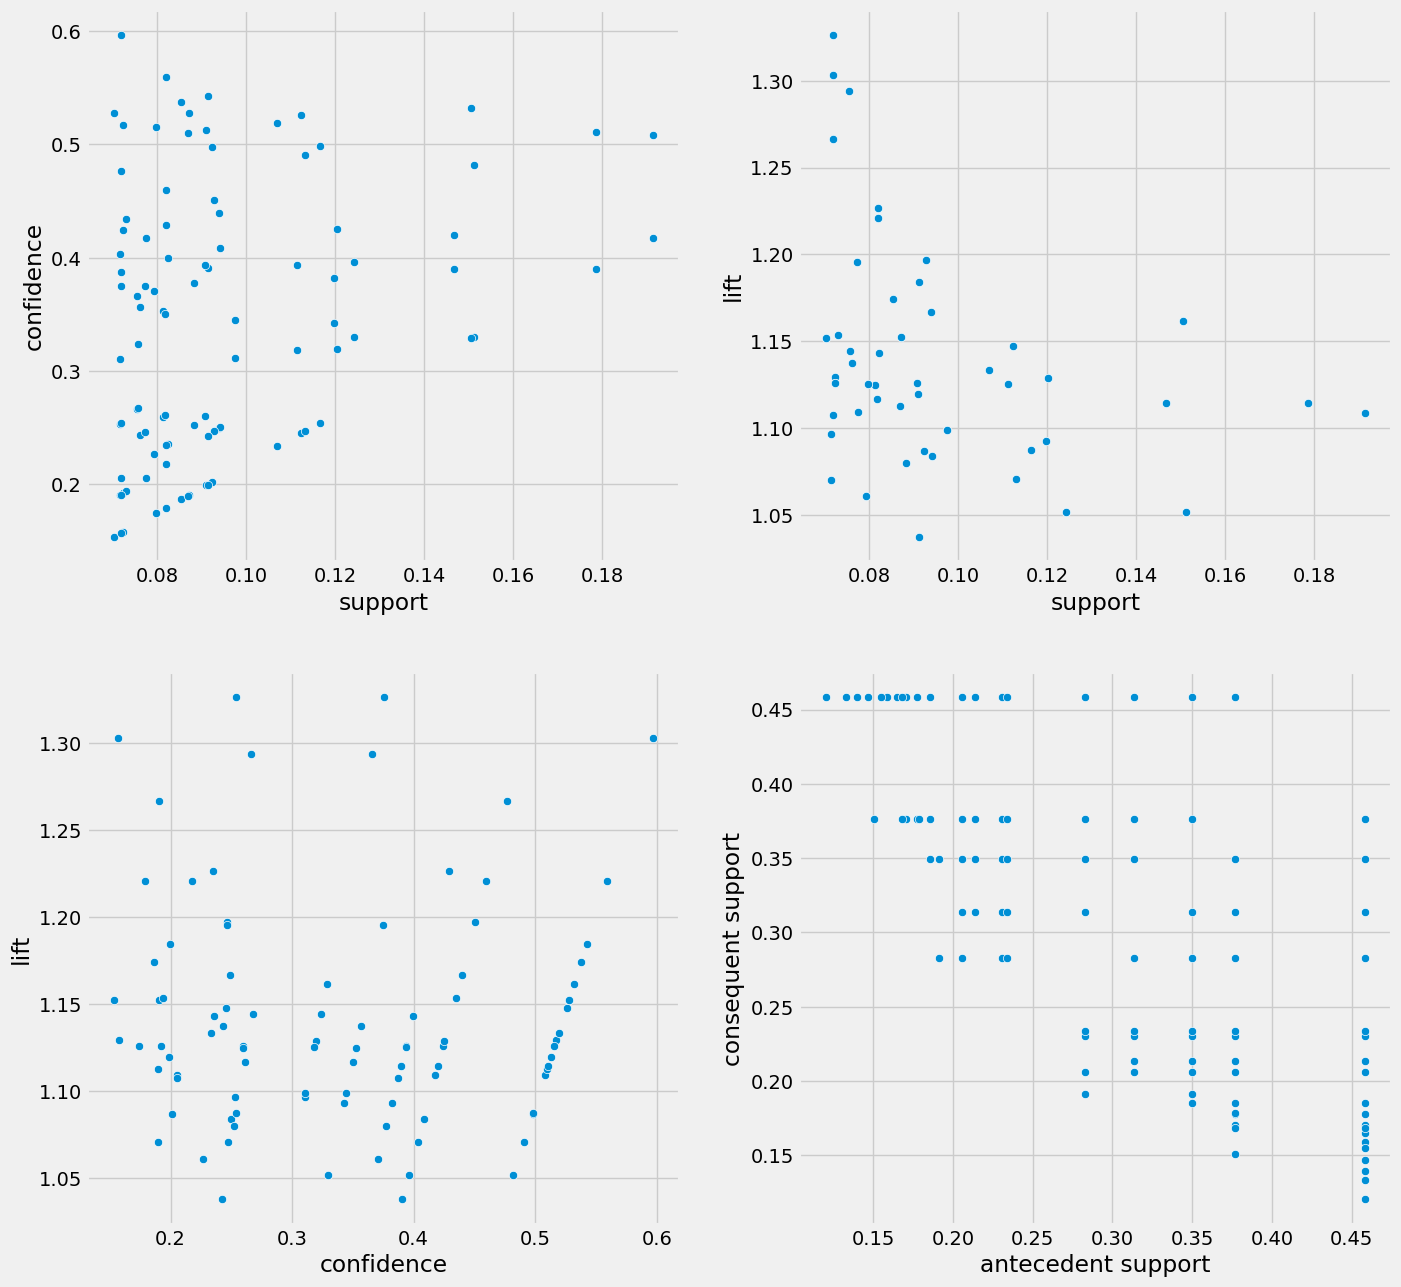

In [ ]:
#Setting up the style
plt.figure(figsize = (15, 15))

#Plotting the relationship between the metrics
plt.subplot(221)
sns.scatterplot(x="support", y="confidence",data=rules)
plt.subplot(222)
sns.scatterplot(x="support", y="lift",data=rules)
plt.subplot(223)
sns.scatterplot(x="confidence", y="lift",data=rules)
plt.subplot(224)
sns.scatterplot(x="antecedent support", y="consequent support",data=rules)


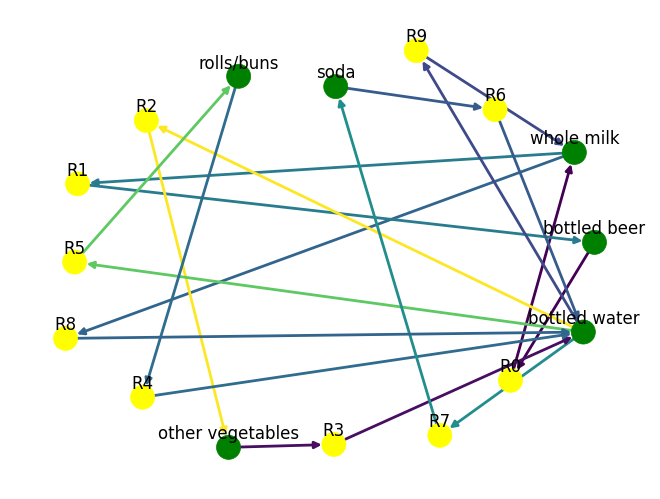

In [ ]:
'''a function to build a network diagram connecting antecedents and consequents'''
def draw_graph(rules, rules_to_show):
  import networkx as nx
  G1 = nx.DiGraph()

  color_map=[]
  N = 50
  colors = np.random.rand(N)
  strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']


  for i in range (rules_to_show):
    G1.add_nodes_from(["R"+str(i)])


    for a in rules.iloc[i]['antecedents']:

        G1.add_nodes_from([a])

        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)

    for c in rules.iloc[i]['consequents']:

            G1.add_nodes_from([a])

            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

  for node in G1:
       found_a_string = False
       for item in strs:
           if node==item:
                found_a_string = True
       if found_a_string:
            color_map.append('yellow')
       else:
            color_map.append('green')

  edges = G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]

  pos = nx.spring_layout(G1, k=16, scale=1)
  #nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)
  nx.draw(G1, pos,  node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)

  for p in pos:  # raise text positions
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.show()

#Calling function with 10 rules
draw_graph(rules, 10)


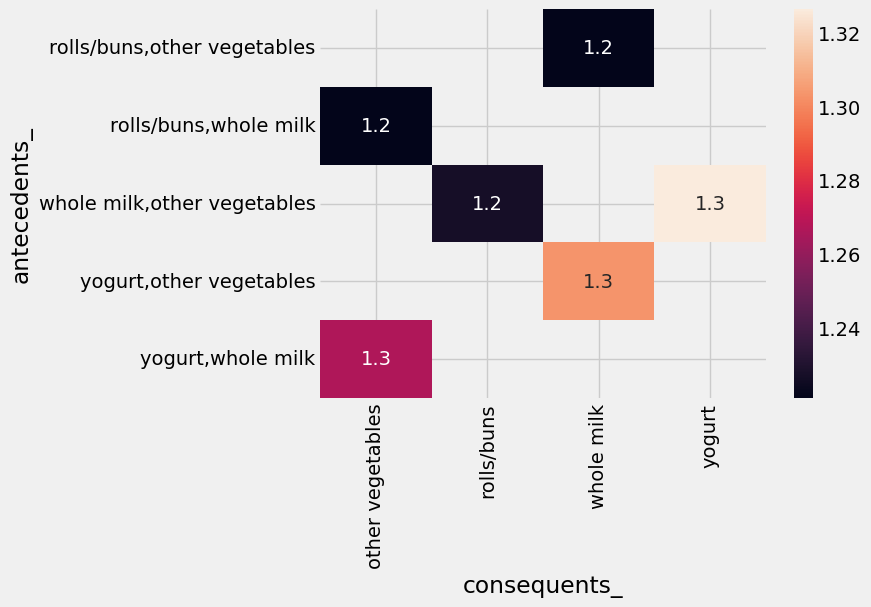

In [ ]:
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_',
                    columns = 'consequents_', values= 'lift')


# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_',
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

Parallel category Plot
---
<Big> Trading flow might be complicated, it is not very to describe in Text.

In [ ]:
# Convert frozen sets to strings for plotting
rules_df=rules[:200].copy()
rules_df['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_df['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))



In [ ]:
fig = px.parallel_categories(
       rules_df,
       dimensions=['antecedents', 'consequents'],
       color="lift",# color_continuous_scale=px.colors.sequential.Inferno,
       title="Parallel Category Plot of Association Rules")
fig.show()

<img src="https://drive.google.com/uc?export=view&id=1dmlsC1G7o_W2EoWb_YYKZ57W9_arqiIf" width=1200 />


In [ ]:
# Optionally round numeric values for cleaner visuals
rules_df['support'] = rules['support'].round(3)
rules_df['confidence'] = rules['confidence'].round(3)
rules_df['lift'] = rules['lift'].round(2)

# Convert numeric columns to strings to use as categorical dimensions
#rules_df['support_str'] = rules['support'].astype(str)
#rules_df['confidence_str'] = rules['confidence'].astype(str)
#rules_df['lift_str'] = rules['lift'].astype(str)

# Format support, confidence, and lift to 3 decimal places as strings
rules_df['support_str'] = rules['support'].map(lambda x: f"{x:.3f}")
rules_df['confidence_str'] = rules['confidence'].map(lambda x: f"{x:.3f}")
rules_df['lift_str'] = rules['lift'].map(lambda x: f"{x:.3f}")

# Create parallel category plot
fig = px.parallel_categories(
    rules_df,
    dimensions=['antecedents', 'consequents','support_str', 'confidence_str','lift_str'],
    color='lift',
    color_continuous_scale=px.colors.sequential.Viridis,
    title="Association Rules: Parallel Category Plot"
)

#px.parallel_categories(rules[['antecedents',	'consequents']])
fig.show()

<img src="https://drive.google.com/uc?export=view&id=1Pk8oiYIz7bdjHUcW3NcsU3a8SscCex6e" width=1400 />



<Huge>Let Us to wait for your excellent work to report and Thank for your patience in the lecture.</Huge>